# Key Insights

<ul>
<li>Combination of product category and product id does not have unique price per item
showing that either data is from different stores or there is some seasonality or variable
present because of which the same article can have more than 1 price.</li>
<li>Customer 1002 and 1004 spent most on Fashion and customer 1003 spent most on
home decor.</li>
<li>CustomerID 1001 and 1005 mostly used trust points for their transactions which shows
that they are loyal customers because of which they received more trust points.</li>
<li>Customer 1003 paid more most of his transactions using cash </li>
<li>Highest number of transactions in a day was 8 which happened two times 2nd and 8th of
August, 2024 both of which were friday indicating people purchase more towards the
beginning of the weekend. </li>
<li>Maximum revenue amount was made on 2nd of August 2024. </li>
<li>Electronics and Toys are the most bought product categories jointly covering more than
50% of all transactions. </li>
<li>Maximum Amount was spent on fashion products where most of the outliers from
dataset lie showing people spend more on fashion </li>
<li>Average discount given over fashion and home decor products were the highest which
makes sense considering fashion contributed the most in revenue and the next category
in line being home decor. </li>
<li>For fashion and electronics products more than half of the transactions were made using
cash but for grocery mostly trust points were used to make payments. </li>
<li>Maximum Amount was paid using cash as the payment method. </li>
<li>Correlation coefficients between the numerical columns is very low suggesting that data
is not linearly projected. </li>
</ul>

# Data Visualization

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Columns in dataset
TransactionID (Numerical)
CustomerID INT (Categorical)
TransactionDate TIMESTAMP (Categorical)
ProductID INT (Categorical)
ProductCategory VARCHAR(50) (Categorical)
Quantity INT (Numerical)
PricePerUnit DECIMAL(10, 2) (Numerical)
TotalAmount DECIMAL(10, 2) (Numerical)
TrustPointsUsed INT (Numerical)
PaymentMethod VARCHAR(50) (Categorical)
DiscountApplied DECIMAL(5, 2) (Categorical)

In [5]:
# Load the CSV file into a DataFrame
file_path = 'data-1724263512340.csv'  # Replace with your file path
df = pd.read_csv(file_path)

# Sort the DataFrame by TransactionID
df_sorted = df.sort_values(by='transactionid')

# Display the sorted DataFrame
print(df_sorted.head())

    transactionid  customerid transactiondate  productid productcategory  \
4               1        1002  08/08/24 22:00       2008         Grocery   
17              2        1003  07/08/24 17:00       2001            Toys   
5               3        1004  02/08/24 19:00       2002         Grocery   
2               4           0   07/08/24 1:00       2004      Home Decor   
6               5        1001   09/08/24 9:00       2008         Grocery   

    quantity  priceperunit  totalamount  trustpointsused paymentmethod  \
4          1          10.0         10.0               20  Trust Points   
17         2          30.0         60.0               50       Unknown   
5          3          30.0         90.0                0   Credit Card   
2          1          10.0         10.0                0   Credit Card   
6          1          25.0         25.0               20  Trust Points   

    discountapplied  
4               5.0  
17             20.0  
5              25.0  
2         

In [6]:
#check datatypes of columns
print(df.dtypes)

transactionid        int64
customerid           int64
transactiondate     object
productid            int64
productcategory     object
quantity             int64
priceperunit       float64
totalamount        float64
trustpointsused      int64
paymentmethod       object
discountapplied    float64
dtype: object


In [9]:
# Convert TransactionDate to timestamp if it's not already
df['transactiondate'] = pd.to_datetime(df['transactiondate'], errors='coerce')

# Check the data type again after conversion
print("Data type after conversion:", df['transactiondate'].dtype)

Data type after conversion: datetime64[ns]


## CustomerID analysis

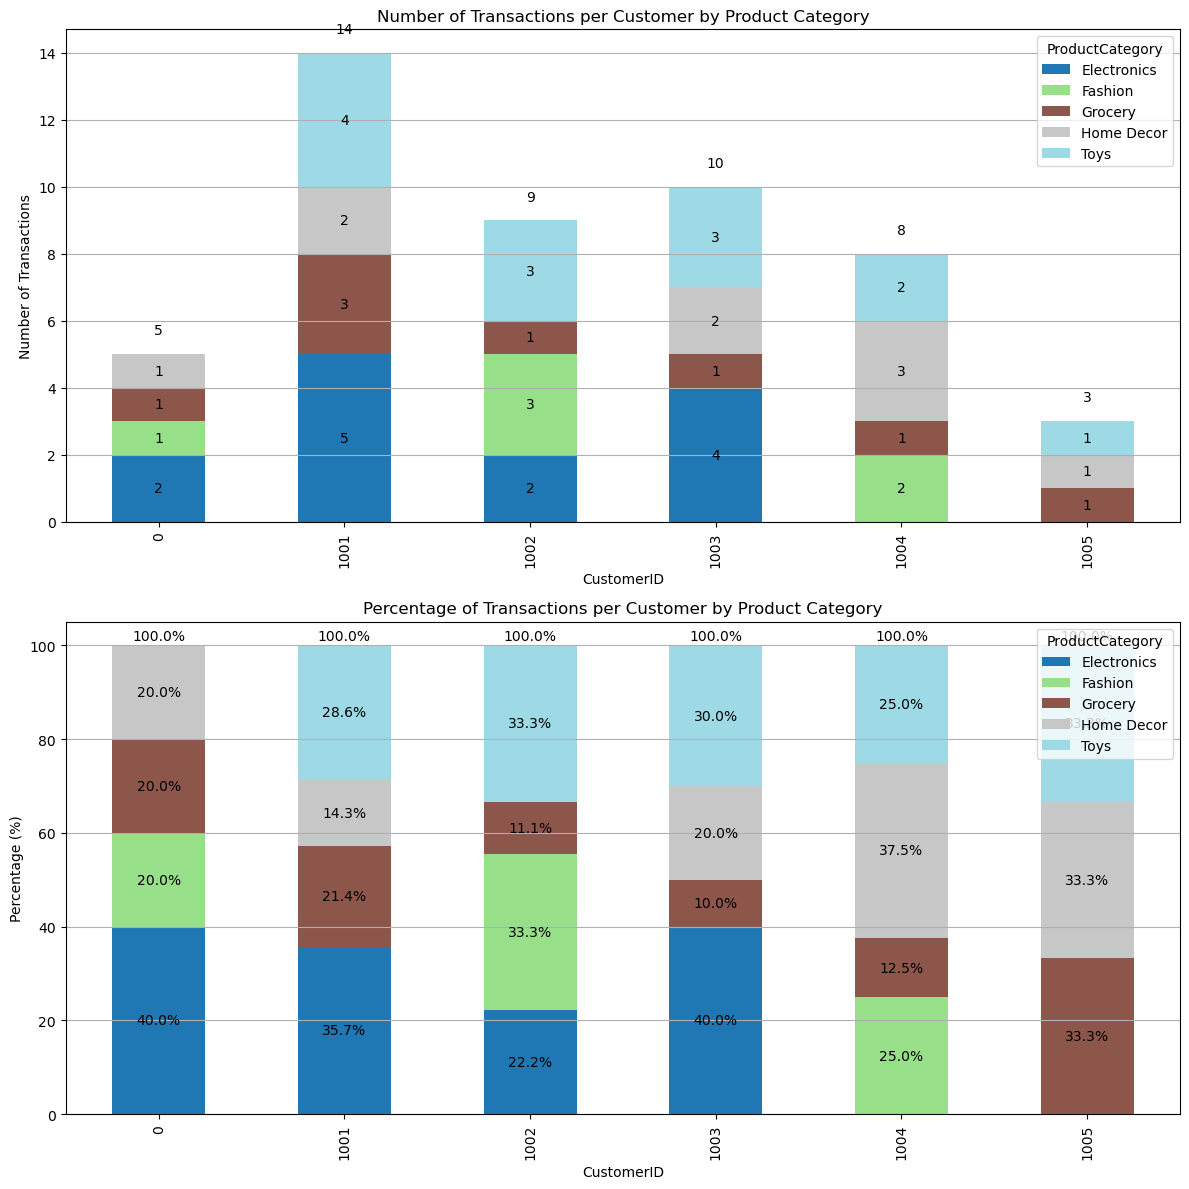

In [19]:
# Step 2: Group by 'CustomerID' and 'ProductCategory', and count the number of transactions
transaction_counts = df.groupby(['customerid', 'productcategory']).size().unstack(fill_value=0)

# Calculate percentages
transaction_percentages = transaction_counts.div(transaction_counts.sum(axis=1), axis=0) * 100

# Create a figure with two subplots
fig, axs = plt.subplots(2, 1, figsize=(12, 12))

# Absolute counts bar chart
transaction_counts.plot(kind='bar', stacked=True, ax=axs[0], cmap='tab20')
axs[0].set_title('Number of Transactions per Customer by Product Category')
axs[0].set_xlabel('CustomerID')
axs[0].set_ylabel('Number of Transactions')
axs[0].set_xticklabels(transaction_counts.index, rotation=90)
axs[0].legend(title='ProductCategory')
axs[0].grid(axis='y')

# Annotate absolute counts
for p in axs[0].patches:
    height = p.get_height()
    if height > 0:
        x = p.get_x() + p.get_width() / 2
        y = p.get_y() + height / 2
        axs[0].text(x, y, int(height), ha='center', va='center', color='black')

# Annotate total transaction count at the top of each bar
total_counts = transaction_counts.sum(axis=1)
for i, total in enumerate(total_counts):
    axs[0].text(i, total + 0.5, int(total), ha='center', va='bottom', color='black')

# Percentage bar chart
transaction_percentages.plot(kind='bar', stacked=True, ax=axs[1], cmap='tab20')
axs[1].set_title('Percentage of Transactions per Customer by Product Category')
axs[1].set_xlabel('CustomerID')
axs[1].set_ylabel('Percentage (%)')
axs[1].set_xticklabels(transaction_percentages.index, rotation=90)
axs[1].legend(title='ProductCategory')
axs[1].grid(axis='y')

# Annotate percentage counts
for p in axs[1].patches:
    height = p.get_height()
    if height > 0:
        x = p.get_x() + p.get_width() / 2
        y = p.get_y() + height / 2
        axs[1].text(x, y, f'{height:.1f}%', ha='center', va='center', color='black')

# Annotate percentage total at the top of each bar
total_percentages = transaction_percentages.sum(axis=1)
for i, total in enumerate(total_percentages):
    axs[1].text(i, total + 0.5, f'{total:.1f}%', ha='center', va='bottom', color='black')

plt.tight_layout()
plt.show()

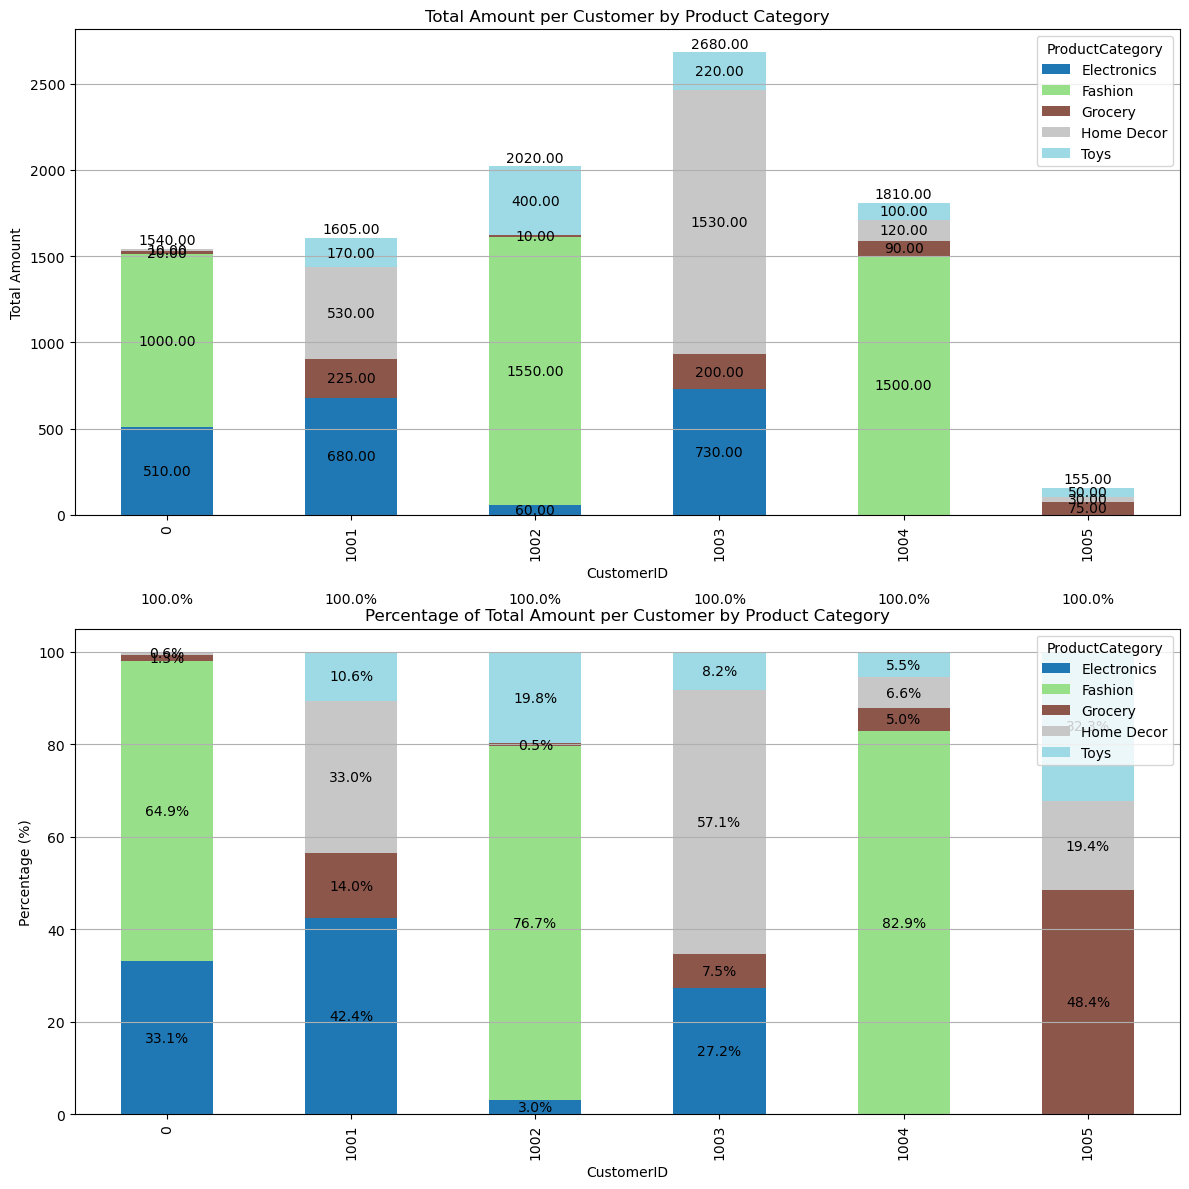

In [25]:
# Step 2: Group by 'CustomerID' and 'ProductCategory', and sum the 'TotalAmount'
amounts = df.groupby(['customerid', 'productcategory'])['totalamount'].sum().unstack(fill_value=0)

# Calculate percentages
amount_percentages = amounts.div(amounts.sum(axis=1), axis=0) * 100

# Create a figure with two subplots
fig, axs = plt.subplots(2, 1, figsize=(12, 12))

# Absolute amounts bar chart
amounts.plot(kind='bar', stacked=True, ax=axs[0], cmap='tab20')
axs[0].set_title('Total Amount per Customer by Product Category')
axs[0].set_xlabel('CustomerID')
axs[0].set_ylabel('Total Amount')
axs[0].set_xticklabels(amounts.index, rotation=90)
axs[0].legend(title='ProductCategory')
axs[0].grid(axis='y')

# Annotate absolute amounts
for p in axs[0].patches:
    height = p.get_height()
    if height > 0:
        x = p.get_x() + p.get_width() / 2
        y = p.get_y() + height / 2
        axs[0].text(x, y, f'{height:.2f}', ha='center', va='center', color='black')

# Annotate total amount at the top of each bar
total_amounts = amounts.sum(axis=1)
for i, total in enumerate(total_amounts):
    axs[0].text(i, total + 10, f'{total:.2f}', ha='center', va='bottom', color='black')

# Percentage bar chart
amount_percentages.plot(kind='bar', stacked=True, ax=axs[1], cmap='tab20')
axs[1].set_title('Percentage of Total Amount per Customer by Product Category')
axs[1].set_xlabel('CustomerID')
axs[1].set_ylabel('Percentage (%)')
axs[1].set_xticklabels(amount_percentages.index, rotation=90)
axs[1].legend(title='ProductCategory')
axs[1].grid(axis='y')

# Annotate percentage amounts
for p in axs[1].patches:
    height = p.get_height()
    if height > 0:
        x = p.get_x() + p.get_width() / 2
        y = p.get_y() + height / 2
        axs[1].text(x, y, f'{height:.1f}%', ha='center', va='center', color='black')

# Annotate percentage total at the top of each bar
total_percentages = amount_percentages.sum(axis=1)
for i, total in enumerate(total_percentages):
    axs[1].text(i, total + 10, f'{total:.1f}%', ha='center', va='bottom', color='black')

plt.tight_layout()
plt.show()

Customer 1002 and 1004 spent most on Fashion and customer 1003 spent most on home decor

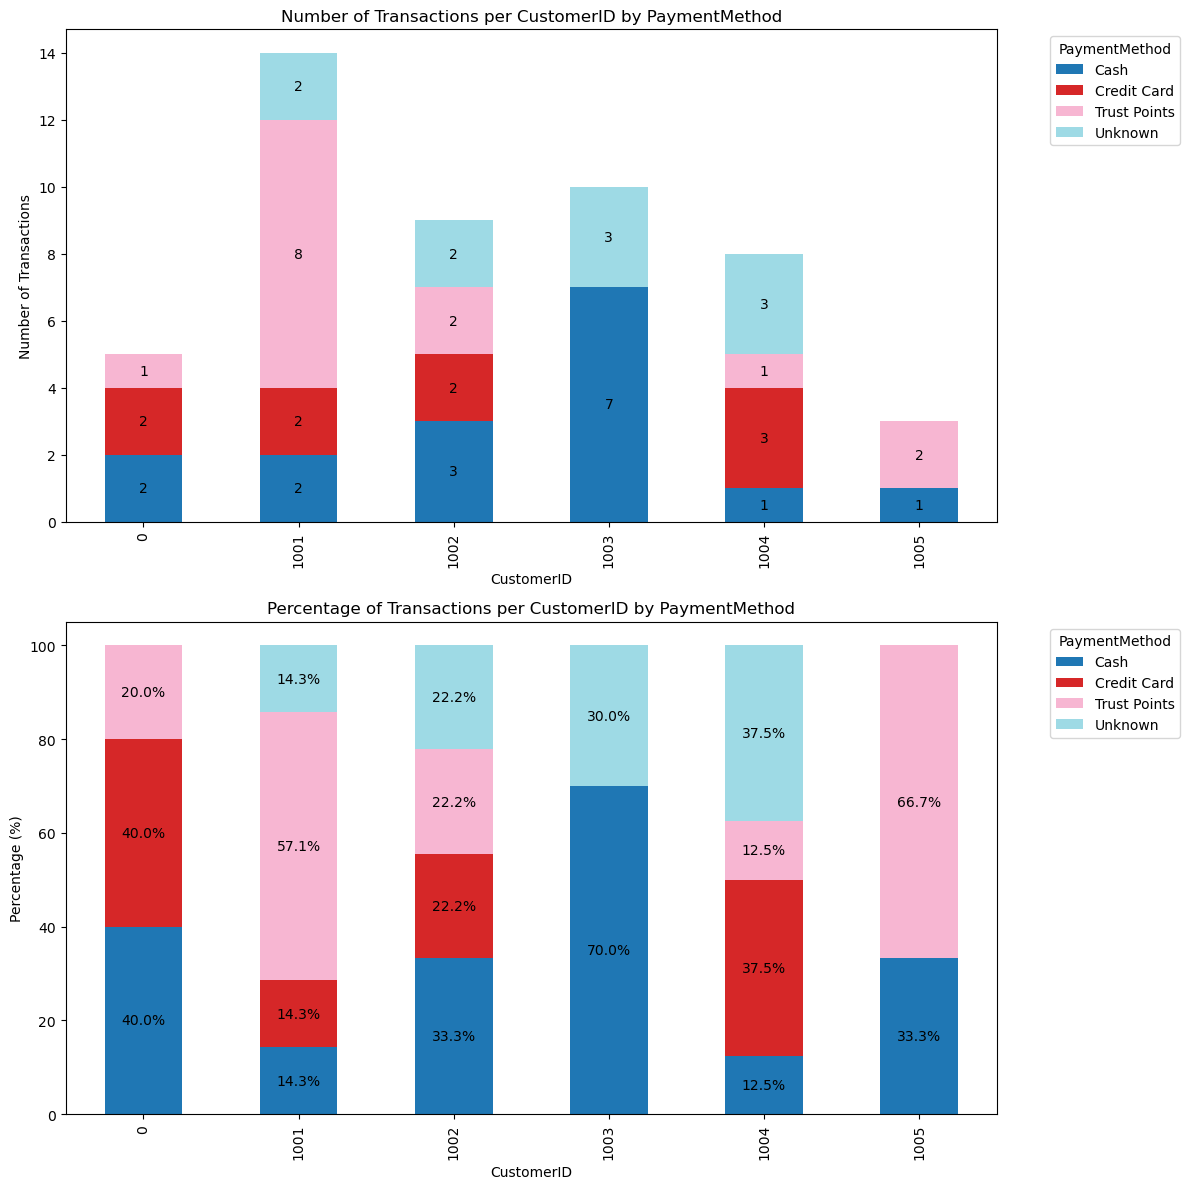

In [29]:
# Group by CustomerID and PaymentMethod and count the number of transactions
payment_counts = df.groupby(['customerid', 'paymentmethod']).size().unstack(fill_value=0)

# Create a figure with two subplots
fig, axs = plt.subplots(2, 1, figsize=(12, 12))

# Plot the absolute number of transactions
ax1 = payment_counts.plot(kind='bar', stacked=True, ax=axs[0], colormap='tab20')
axs[0].set_title('Number of Transactions per CustomerID by PaymentMethod')
axs[0].set_xlabel('CustomerID')
axs[0].set_ylabel('Number of Transactions')
axs[0].legend(title='PaymentMethod', bbox_to_anchor=(1.05, 1), loc='upper left')

# # Add numerical values inside the bars
# for container in ax1.containers:
#     ax1.bar_label(container, label_type='edge', padding=3)

# Annotate absolute counts
for p in axs[0].patches:
    height = p.get_height()
    if height > 0:
        x = p.get_x() + p.get_width() / 2
        y = p.get_y() + height / 2
        axs[0].text(x, y, int(height), ha='center', va='center', color='black')


# Calculate the percentage for each PaymentMethod
payment_percentages = payment_counts.div(payment_counts.sum(axis=1), axis=0) * 100

# Plot the percentage of transactions
ax2 = payment_percentages.plot(kind='bar', stacked=True, ax=axs[1], colormap='tab20')
axs[1].set_title('Percentage of Transactions per CustomerID by PaymentMethod')
axs[1].set_xlabel('CustomerID')
axs[1].set_ylabel('Percentage (%)')
axs[1].legend(title='PaymentMethod', bbox_to_anchor=(1.05, 1), loc='upper left')

# Annotate percentage counts
for p in axs[1].patches:
    height = p.get_height()
    if height > 0:
        x = p.get_x() + p.get_width() / 2
        y = p.get_y() + height / 2
        axs[1].text(x, y, f'{height:.1f}%', ha='center', va='center', color='black')

# Adjust layout
plt.tight_layout()
plt.show()

<ul>
     <li>Customer 1001 and 1005 used trust points as payment method for majority of their transactions showing they are more loyal which ensures more trust points </li>
    <li> Customer 1003 used cash majorly </li>
</ul>

## transactiondate analysis

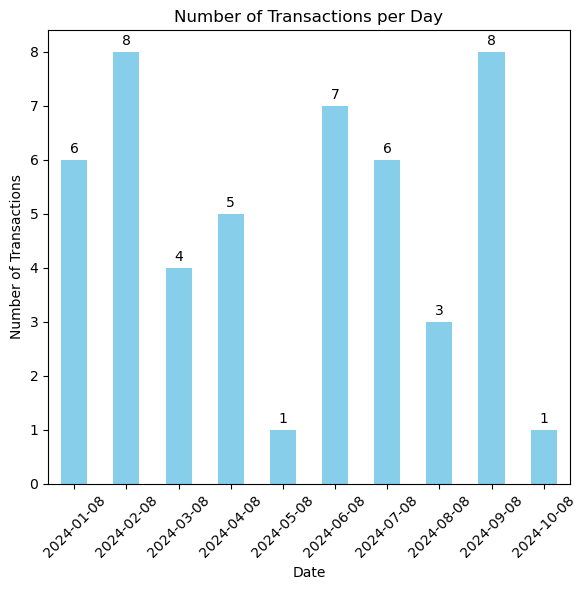

In [34]:
# Extract the date from the TransactionDate column
df['transactiondate'] = pd.to_datetime(df['transactiondate'])
df['TransactionDateOnly'] = df['transactiondate'].dt.date

# Group by the extracted date and count the number of transactions
daily_transactions = df.groupby('TransactionDateOnly').size()

# Plot the number of transactions per day
fig, ax = plt.subplots(figsize=(6, 6))
bars = daily_transactions.plot(kind='bar', color='skyblue', ax=ax)

# Add labels at the top of each bar
ax.bar_label(bars.containers[0], label_type='edge', padding=3)

# Set titles and labels
ax.set_title('Number of Transactions per Day')
ax.set_xlabel('Date')
ax.set_ylabel('Number of Transactions')
plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()

Both highest number of transactions happened on Friday

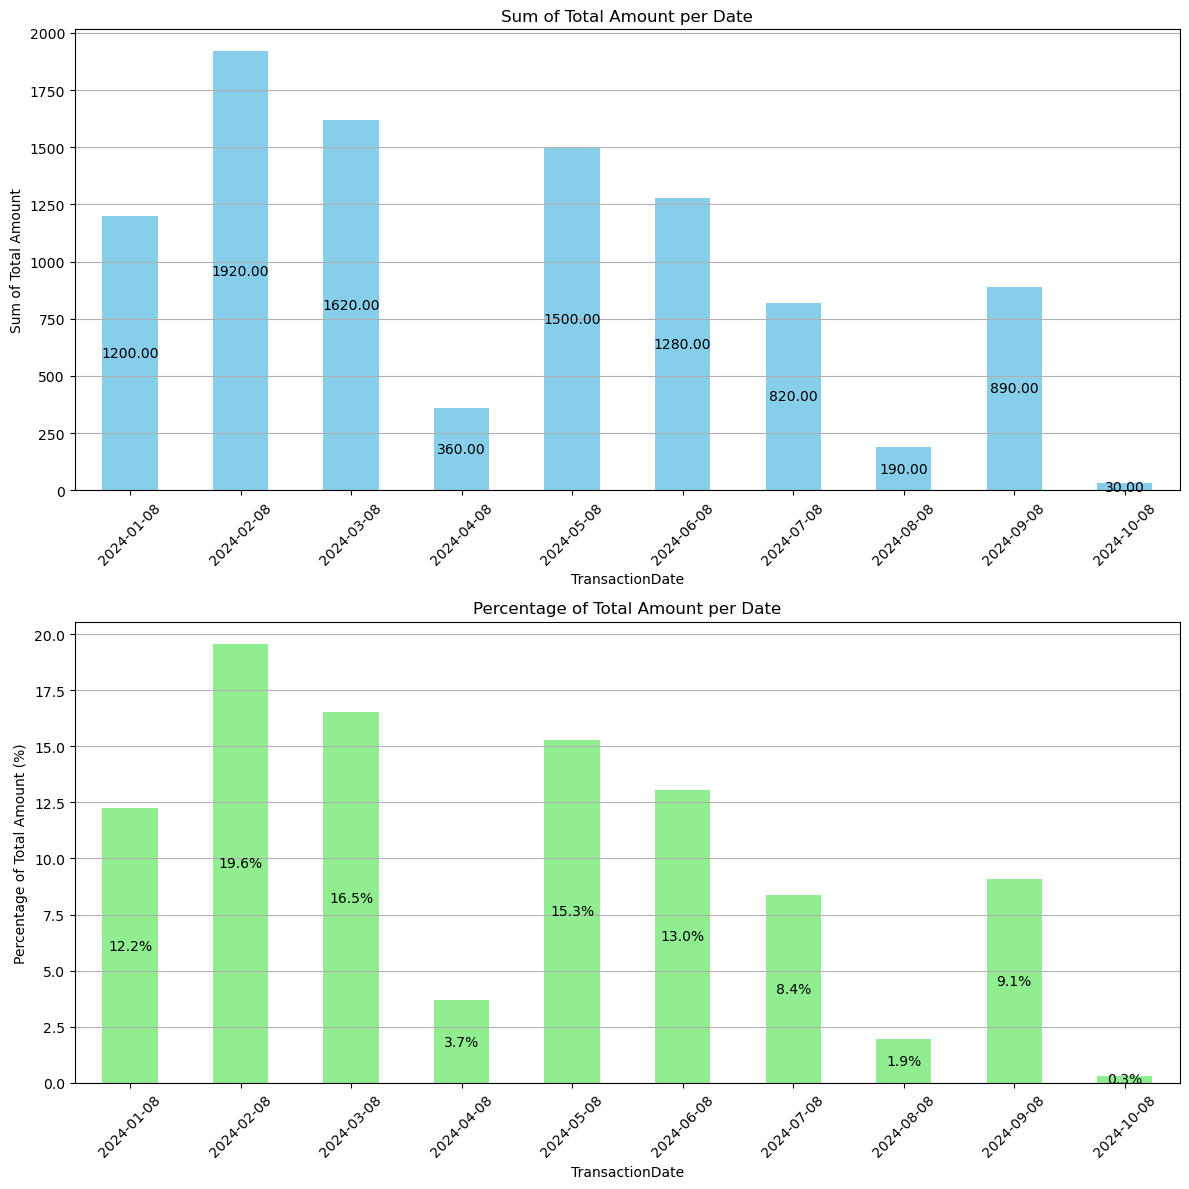

In [38]:
# Group by 'TransactionDateOnly' and sum the 'TotalAmount'
daily_amounts = df.groupby('TransactionDateOnly')['totalamount'].sum()

# Calculate percentages
daily_percentages = daily_amounts / daily_amounts.sum() * 100

# Create a figure with two subplots
fig, axs = plt.subplots(2, 1, figsize=(12, 12))

# Exact sums bar chart
daily_amounts.plot(kind='bar', ax=axs[0], color='skyblue')
axs[0].set_title('Sum of Total Amount per Date')
axs[0].set_xlabel('TransactionDate')
axs[0].set_ylabel('Sum of Total Amount')
axs[0].set_xticklabels(daily_amounts.index, rotation=45)
axs[0].grid(axis='y')

# Annotate exact sums
for p in axs[0].patches:
    height = p.get_height()
    if height > 0:
        x = p.get_x() + p.get_width() / 2
        y = p.get_y() + height / 2
        axs[0].text(x, y, f'{height:.2f}', ha='center', va='center', color='black')

# Percentage bar chart
daily_percentages.plot(kind='bar', ax=axs[1], color='lightgreen')
axs[1].set_title('Percentage of Total Amount per Date')
axs[1].set_xlabel('TransactionDate')
axs[1].set_ylabel('Percentage of Total Amount (%)')
axs[1].set_xticklabels(daily_percentages.index, rotation=45)
axs[1].grid(axis='y')

# Annotate percentages
for p in axs[1].patches:
    height = p.get_height()
    if height > 0:
        x = p.get_x() + p.get_width() / 2
        y = p.get_y() + height / 2
        axs[1].text(x, y, f'{height:.1f}%', ha='center', va='center', color='black')

plt.tight_layout()
plt.show()

max revenue came on 2nd of August, 2024

## ProductCategory analysis

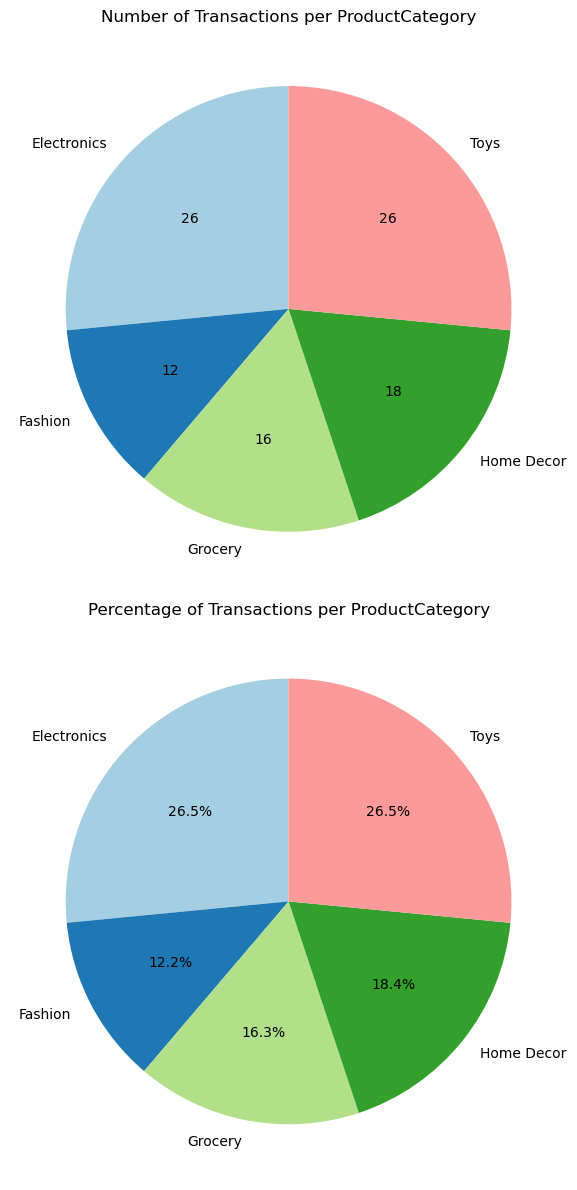

In [52]:
# Calculate the count and percentage for each ProductCategory
category_counts = df.groupby('productcategory').size()
category_percentages = (category_counts / category_counts.sum()) * 100

# Create a figure with two subplots
fig, axs = plt.subplots(2, 1, figsize=(12, 12))

# Plot the absolute number of transactions as a pie chart
ax1 = axs[0]
ax1.pie(category_counts, labels=category_counts.index, autopct='%d', colors=plt.cm.Paired.colors, startangle=90)
ax1.set_title('Number of Transactions per ProductCategory')

# Plot the percentage of transactions as a pie chart
ax2 = axs[1]
ax2.pie(category_percentages, labels=category_percentages.index, autopct='%.1f%%', colors=plt.cm.Paired.colors, startangle=90)
ax2.set_title('Percentage of Transactions per ProductCategory')

# Adjust layout
plt.tight_layout()
plt.show()

Electronics and Toys are the most bought product categories

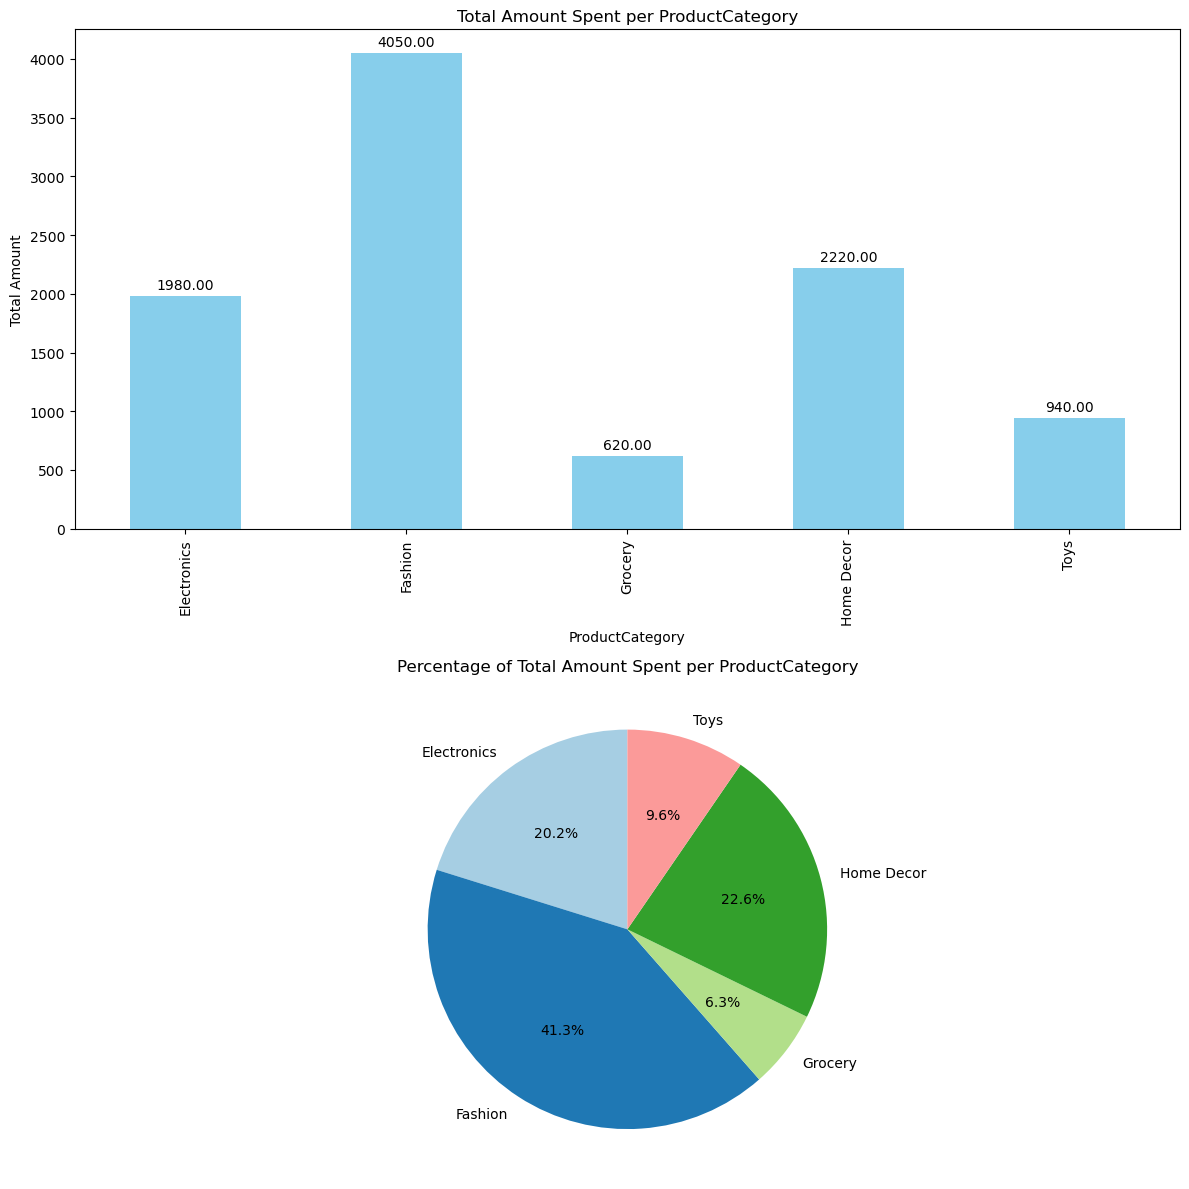

In [56]:
# Group by ProductCategory and sum the TotalAmount
category_sums = df.groupby('productcategory')['totalamount'].sum()

# Calculate the percentage of TotalAmount for each ProductCategory
category_percentages = (category_sums / category_sums.sum()) * 100

# Create a figure with two subplots
fig, axs = plt.subplots(2, 1, figsize=(12, 12))

# Plot the sum of TotalAmount for each ProductCategory as a bar chart
ax1 = category_sums.plot(kind='bar', color='skyblue', ax=axs[0])
axs[0].set_title('Total Amount Spent per ProductCategory')
axs[0].set_xlabel('ProductCategory')
axs[0].set_ylabel('Total Amount')

# Add numerical values inside the bars
for container in ax1.containers:
    ax1.bar_label(container, label_type='edge', padding=3, fmt='%.2f')

# Plot the percentage of TotalAmount for each ProductCategory as a pie chart
ax2 = axs[1]
ax2.pie(category_percentages, labels=category_percentages.index, autopct='%.1f%%', colors=plt.cm.Paired.colors, startangle=90)
axs[1].set_title('Percentage of Total Amount Spent per ProductCategory')

# Adjust layout
plt.tight_layout()
plt.show()

Max Amount was spent on fashion products

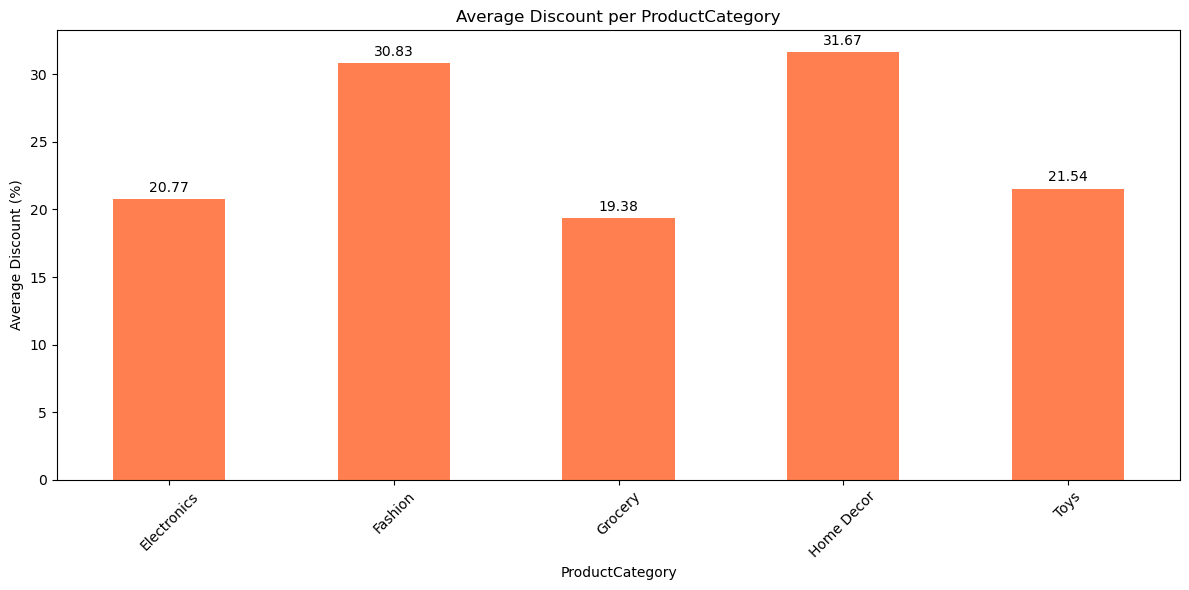

In [41]:
# Group by ProductCategory and calculate the average discount
average_discount = df.groupby('productcategory')['discountapplied'].mean()

# Plot the average discount for each ProductCategory
fig, ax = plt.subplots(figsize=(12, 6))
bars = average_discount.plot(kind='bar', color='coral', ax=ax)

# Add numerical values inside the bars
ax.bar_label(bars.containers[0], label_type='edge', padding=3, fmt='%.2f')

# Set titles and labels
ax.set_title('Average Discount per ProductCategory')
ax.set_xlabel('ProductCategory')
ax.set_ylabel('Average Discount (%)')
plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()

Average discount given over fashion and home decor products were the highest

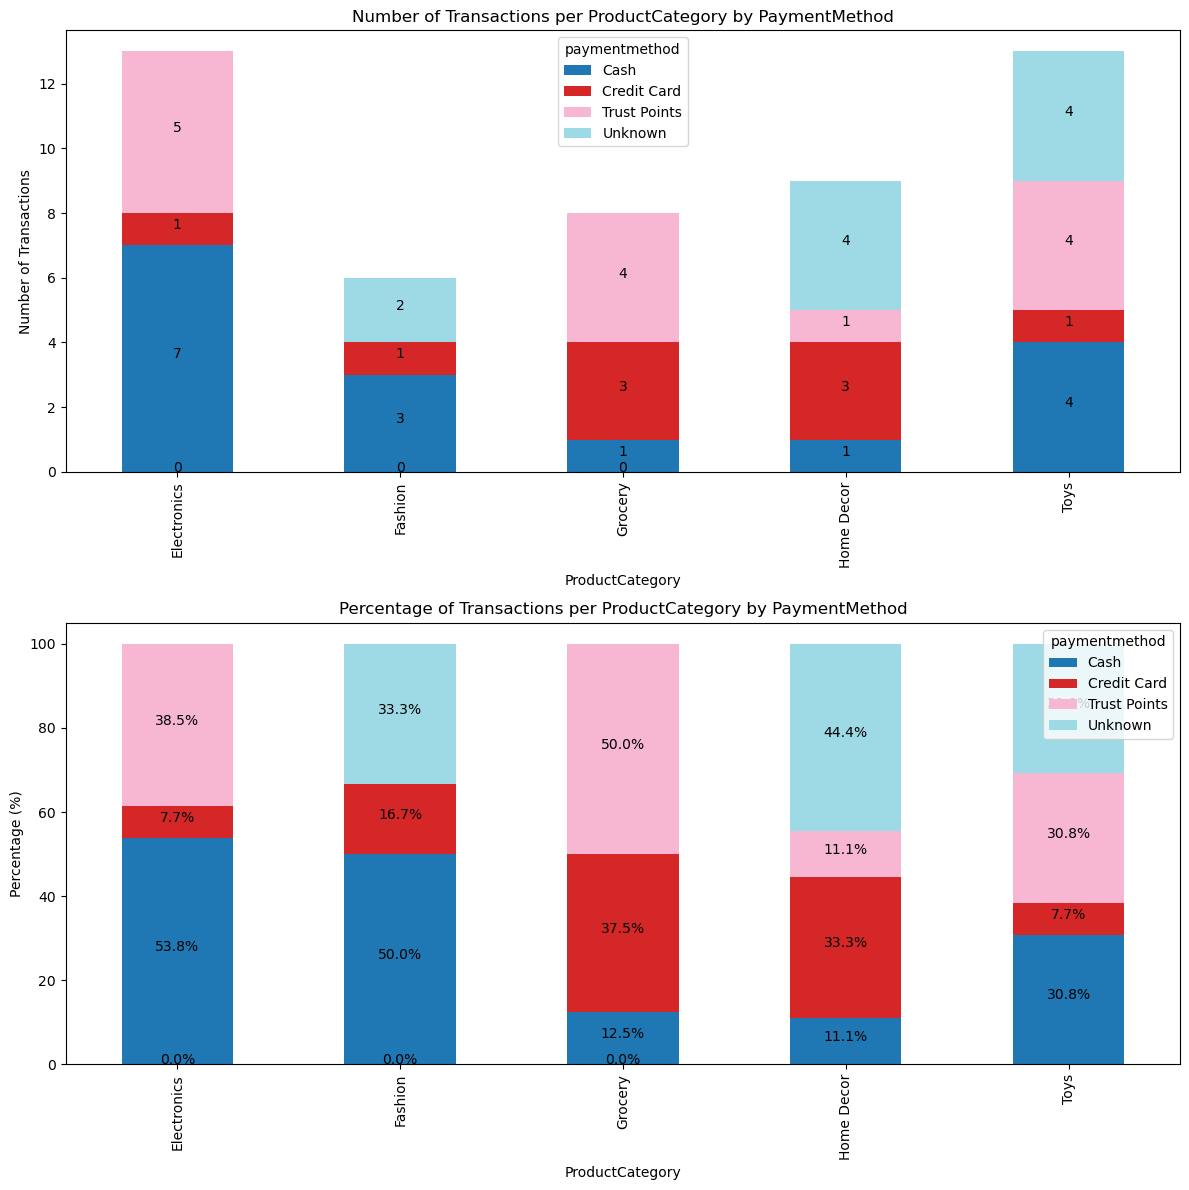

In [42]:
# Group by ProductCategory and PaymentMethod and count the number of transactions
category_payment_counts = df.groupby(['productcategory', 'paymentmethod']).size().unstack(fill_value=0)

# Calculate the percentage of transactions for each PaymentMethod within each ProductCategory
category_payment_percentages = category_payment_counts.divide(category_payment_counts.sum(axis=1), axis=0) * 100

# Create a figure with two subplots
fig, axs = plt.subplots(2, 1, figsize=(12, 12))

# Plot the absolute number of transactions with PaymentMethod as stacks
category_payment_counts.plot(kind='bar', stacked=True, ax=axs[0], colormap='tab20')
axs[0].set_title('Number of Transactions per ProductCategory by PaymentMethod')
axs[0].set_xlabel('ProductCategory')
axs[0].set_ylabel('Number of Transactions')

# Add numerical values inside the stacks
for container in axs[0].containers:
    axs[0].bar_label(container, label_type='center', padding=3, fmt='%d')

# Plot the percentage of transactions with PaymentMethod as stacks
category_payment_percentages.plot(kind='bar', stacked=True, ax=axs[1], colormap='tab20')
axs[1].set_title('Percentage of Transactions per ProductCategory by PaymentMethod')
axs[1].set_xlabel('ProductCategory')
axs[1].set_ylabel('Percentage (%)')

# Add percentage values inside the stacks
for container in axs[1].containers:
    axs[1].bar_label(container, label_type='center', padding=3, fmt='%.1f%%')

# Adjust layout
plt.tight_layout()
plt.show()

for fashion and electronics products more than half of the transactions we made using cash but for grocery mostly trust points were used to make payments

## Payment Method

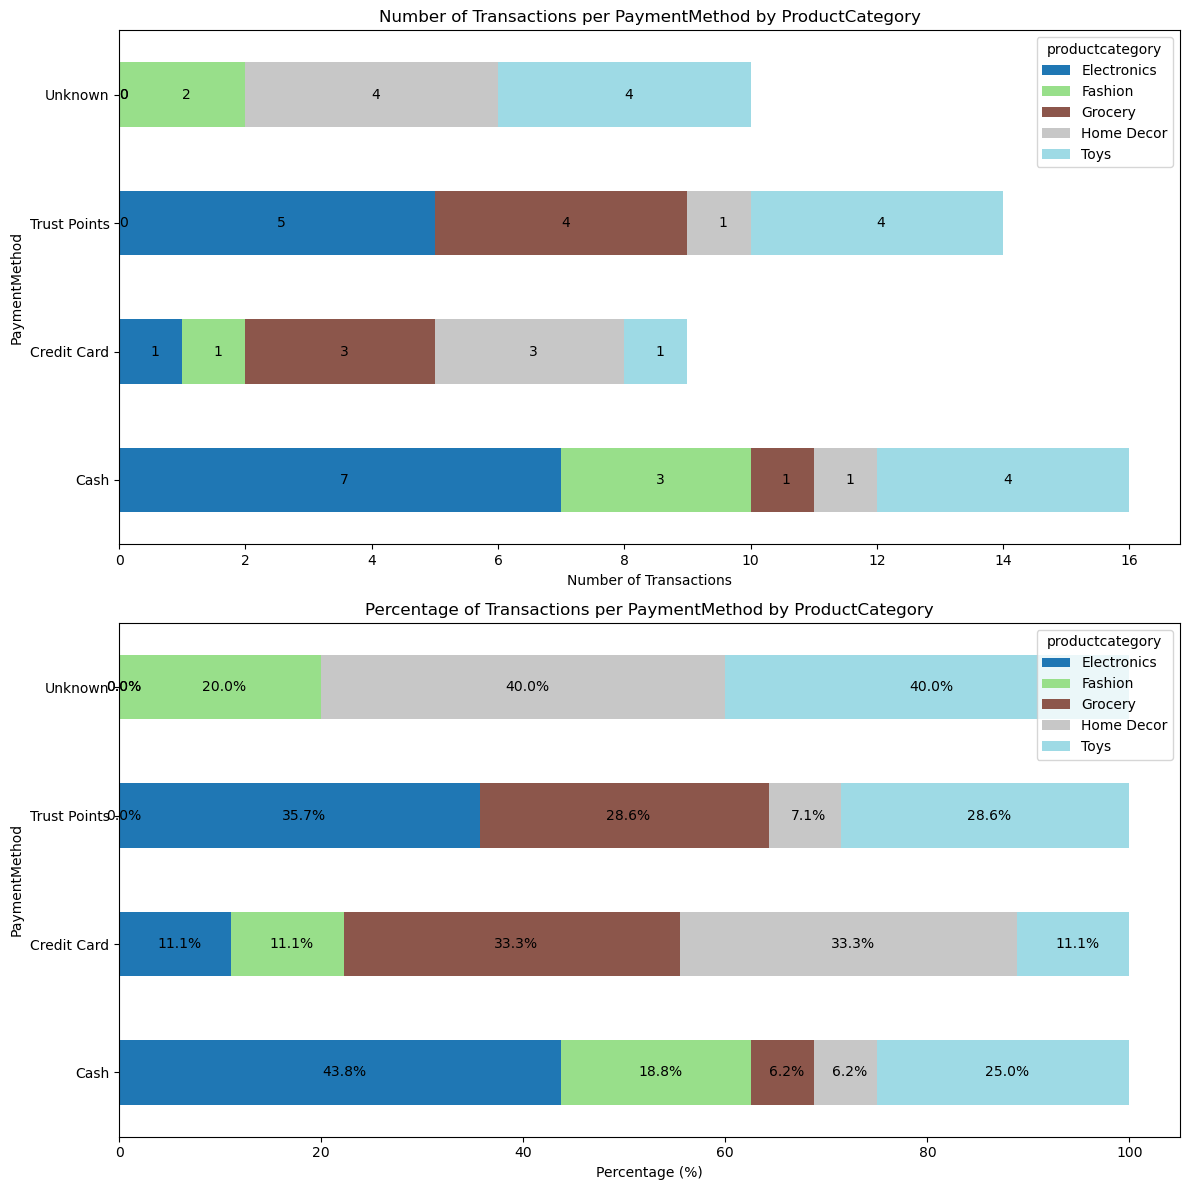

In [43]:
# Group by PaymentMethod and ProductCategory and count the number of transactions
payment_category_counts = df.groupby(['paymentmethod', 'productcategory']).size().unstack(fill_value=0)

# Calculate the percentage of transactions for each ProductCategory within each PaymentMethod
payment_category_percentages = payment_category_counts.divide(payment_category_counts.sum(axis=1), axis=0) * 100

# Create a figure with two subplots
fig, axs = plt.subplots(2, 1, figsize=(12, 12))

# Plot the absolute number of transactions with ProductCategory on y-axis and PaymentMethod on x-axis
payment_category_counts.plot(kind='barh', stacked=True, ax=axs[0], colormap='tab20')
axs[0].set_title('Number of Transactions per PaymentMethod by ProductCategory')
axs[0].set_xlabel('Number of Transactions')
axs[0].set_ylabel('PaymentMethod')

# Add numerical values inside the stacks
for container in axs[0].containers:
    axs[0].bar_label(container, label_type='center', padding=3, fmt='%d')

# Plot the percentage of transactions with ProductCategory on y-axis and PaymentMethod on x-axis
payment_category_percentages.plot(kind='barh', stacked=True, ax=axs[1], colormap='tab20')
axs[1].set_title('Percentage of Transactions per PaymentMethod by ProductCategory')
axs[1].set_xlabel('Percentage (%)')
axs[1].set_ylabel('PaymentMethod')

# Add percentage values inside the stacks
for container in axs[1].containers:
    axs[1].bar_label(container, label_type='center', padding=3, fmt='%.1f%%')

# Adjust layout
plt.tight_layout()
plt.show()

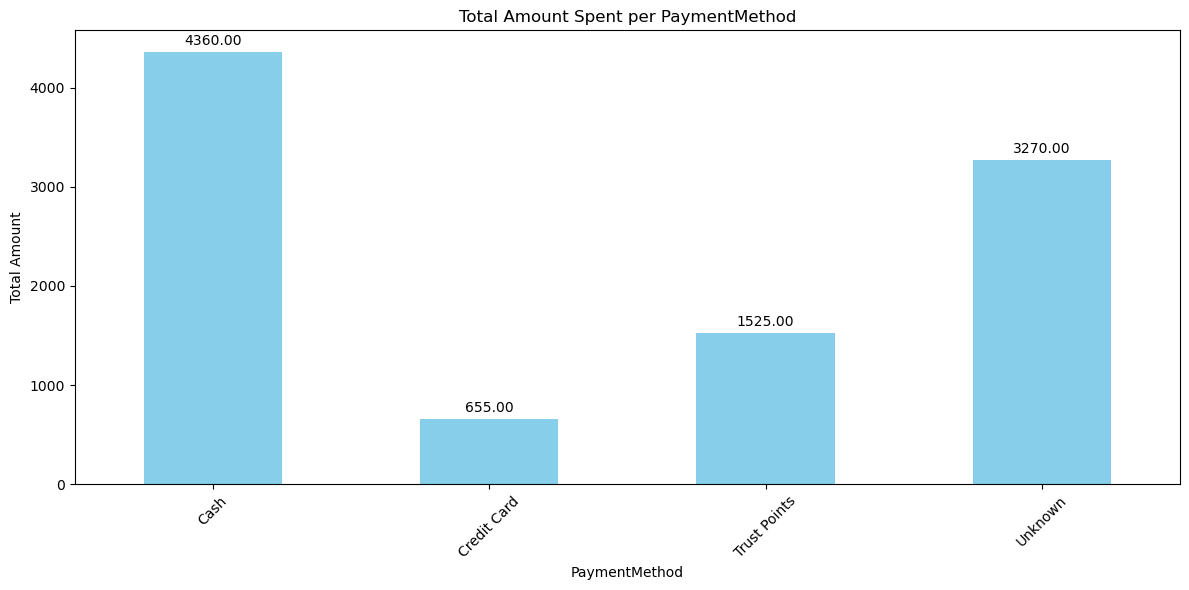

In [44]:
# Group by PaymentMethod and sum the TotalAmount
payment_method_sums = df.groupby('paymentmethod')['totalamount'].sum()

# Plot the sum of TotalAmount for each PaymentMethod
fig, ax = plt.subplots(figsize=(12, 6))
bars = payment_method_sums.plot(kind='bar', color='skyblue', ax=ax)

# Add numerical values inside the bars
ax.bar_label(bars.containers[0], label_type='edge', padding=3, fmt='%.2f')

# Set titles and labels
ax.set_title('Total Amount Spent per PaymentMethod')
ax.set_xlabel('PaymentMethod')
ax.set_ylabel('Total Amount')
plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()

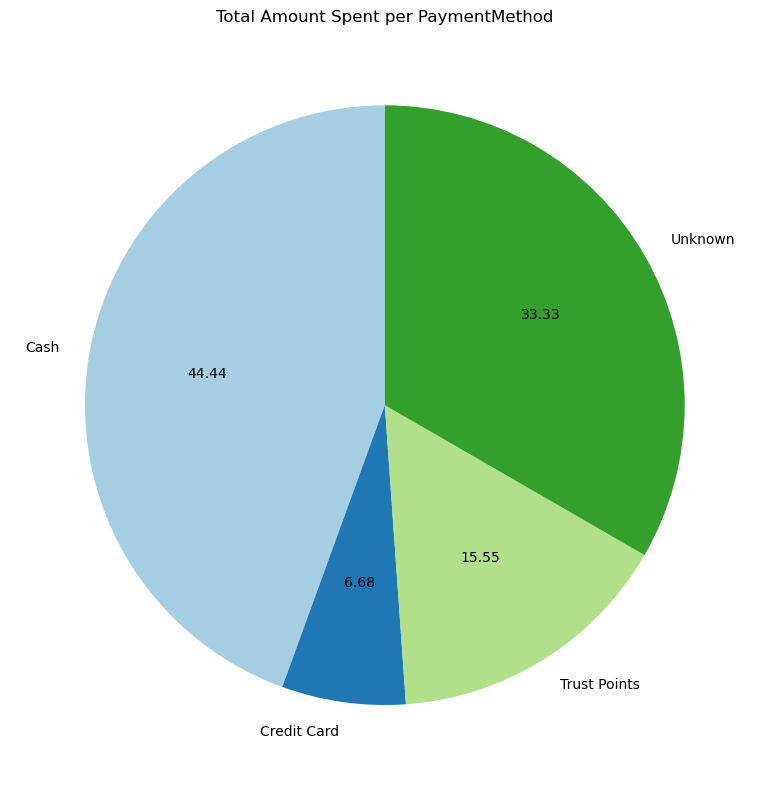

In [57]:
# Group by PaymentMethod and sum the TotalAmount
payment_method_sums = df.groupby('paymentmethod')['totalamount'].sum()

# Create a pie chart for the sum of TotalAmount for each PaymentMethod
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(payment_method_sums, labels=payment_method_sums.index, autopct='%.2f', colors=plt.cm.Paired.colors, startangle=90)

# Set the title
ax.set_title('Total Amount Spent per PaymentMethod')

# Adjust layout
plt.tight_layout()
plt.show()

Maximum Amount was paid using cash as the payment method

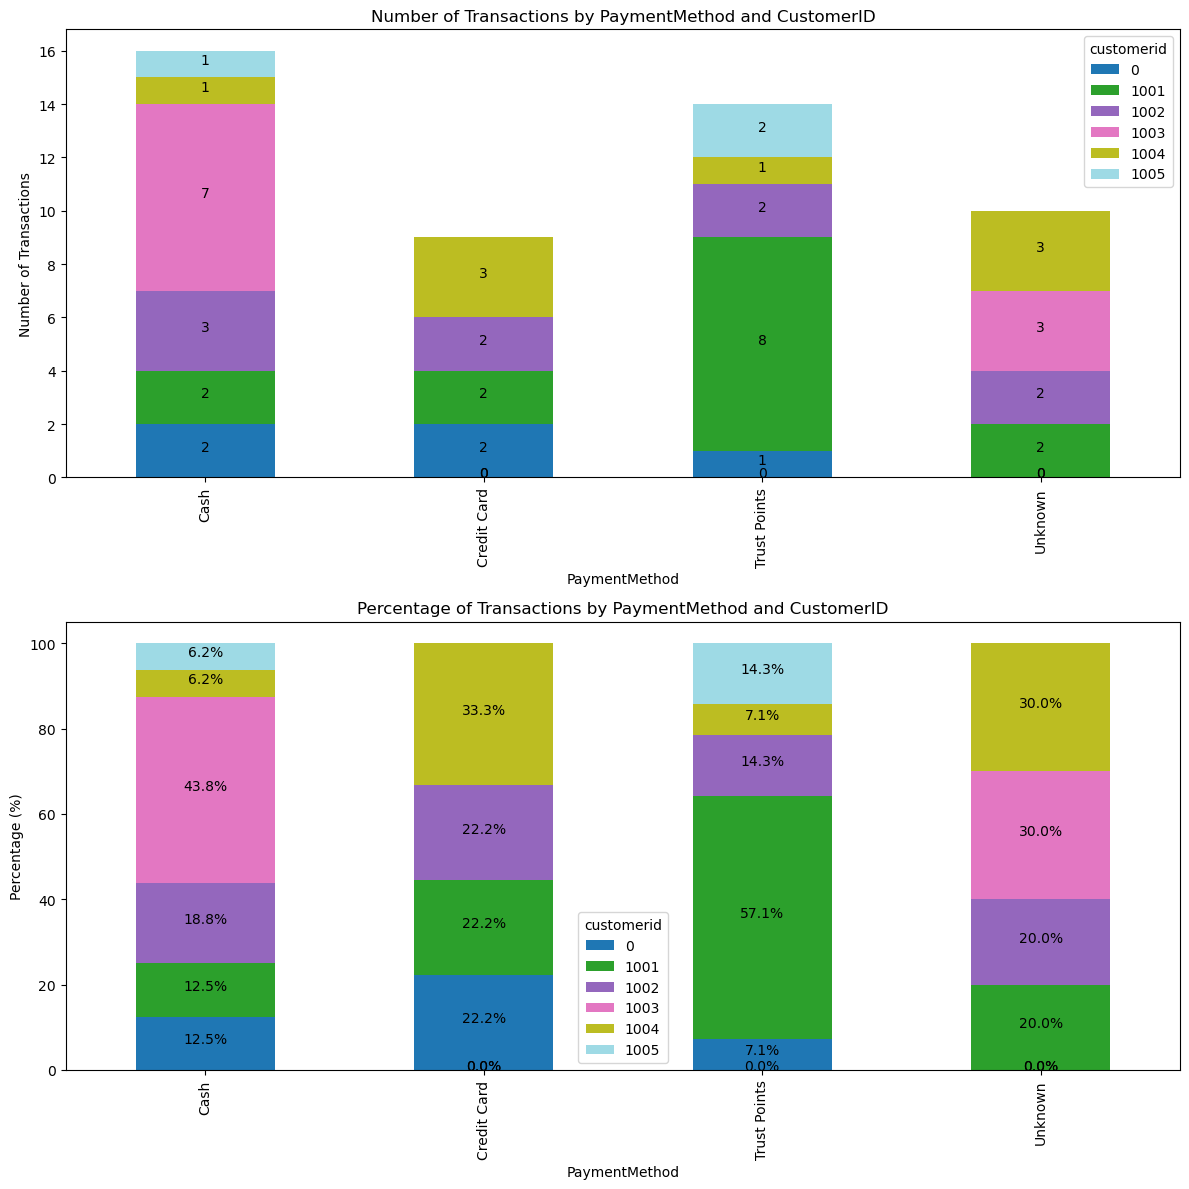

In [49]:
# Group by PaymentMethod and CustomerID and count the number of transactions
payment_customer_counts = df.groupby(['paymentmethod', 'customerid']).size().unstack(fill_value=0)

# Calculate the percentage of transactions for each CustomerID within each PaymentMethod
payment_customer_percentages = payment_customer_counts.divide(payment_customer_counts.sum(axis=1), axis=0) * 100

# Create a figure with two subplots
fig, axs = plt.subplots(2, 1, figsize=(12, 12))

# Plot the absolute number of transactions with CustomerID as stacks and PaymentMethod on x-axis
payment_customer_counts.plot(kind='bar', stacked=True, ax=axs[0], colormap='tab20')
axs[0].set_title('Number of Transactions by PaymentMethod and CustomerID')
axs[0].set_xlabel('PaymentMethod')
axs[0].set_ylabel('Number of Transactions')

# Add numerical values inside the stacks
for container in axs[0].containers:
    axs[0].bar_label(container, label_type='center', padding=3, fmt='%d')

# Plot the percentage of transactions with CustomerID as stacks and PaymentMethod on x-axis
payment_customer_percentages.plot(kind='bar', stacked=True, ax=axs[1], colormap='tab20')
axs[1].set_title('Percentage of Transactions by PaymentMethod and CustomerID')
axs[1].set_xlabel('PaymentMethod')
axs[1].set_ylabel('Percentage (%)')

# Add percentage values inside the stacks
for container in axs[1].containers:
    axs[1].bar_label(container, label_type='center', padding=3, fmt='%.1f%%')

# Adjust layout
plt.tight_layout()
plt.show()

CustomerID 1003 mostly used cash for his payments and 1001 mostly used trust points

## Discount Applied and Trust Points Used

In [46]:
# Calculate correlation between TotalAmount and DiscountApplied
correlation_amount_discount = df['totalamount'].corr(df['discountapplied'])

# Calculate correlation between TotalAmount and TrustPointsUsed
correlation_amount_trustpoints = df['totalamount'].corr(df['trustpointsused'])

# Calculate correlation between DiscountApplied and TrustPointsUsed
correlation_discount_trustpoints = df['discountapplied'].corr(df['trustpointsused'])

# Print the correlations
print(f"Correlation between TotalAmount and DiscountApplied: {correlation_amount_discount:.2f}")
print(f"Correlation between TotalAmount and TrustPointsUsed: {correlation_amount_trustpoints:.2f}")
print(f"Correlation between DiscountApplied and TrustPointsUsed: {correlation_discount_trustpoints:.2f}")

Correlation between TotalAmount and DiscountApplied: 0.36
Correlation between TotalAmount and TrustPointsUsed: 0.15
Correlation between DiscountApplied and TrustPointsUsed: 0.24


As correlation coefficient is low linear projections are not possible

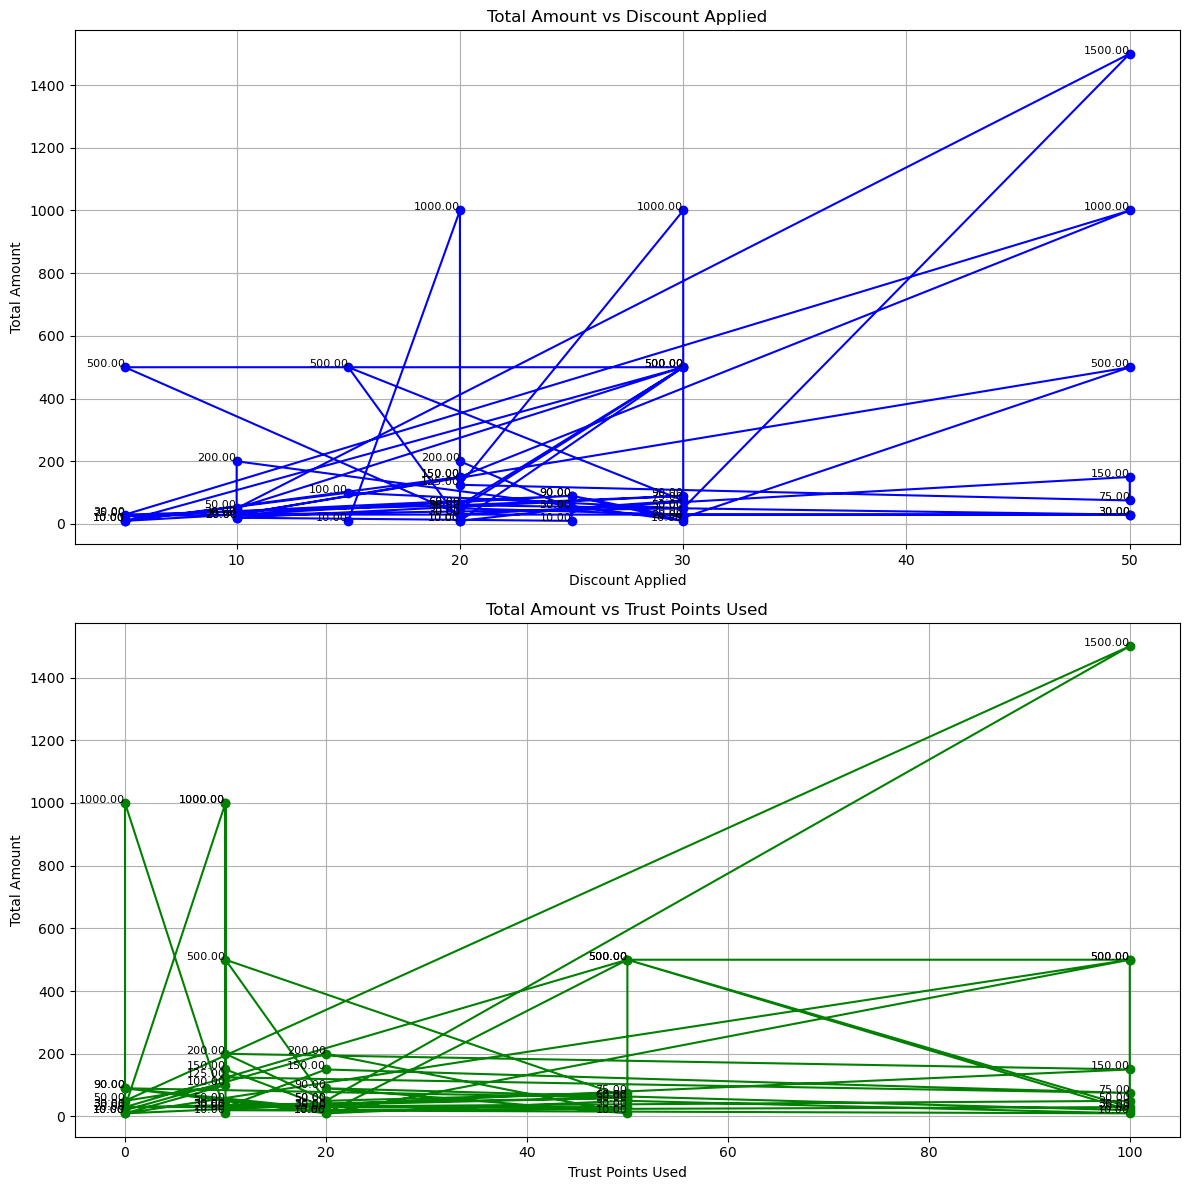

In [50]:
# Create a figure with two subplots
fig, axs = plt.subplots(2, 1, figsize=(12, 12))

# Plot TotalAmount vs DiscountApplied
axs[0].plot(df['discountapplied'], df['totalamount'], 'o-', color='blue')
axs[0].set_title('Total Amount vs Discount Applied')
axs[0].set_xlabel('Discount Applied')
axs[0].set_ylabel('Total Amount')

# Add grid and data labels
axs[0].grid(True)
for i, (discount, total) in enumerate(zip(df['discountapplied'], df['totalamount'])):
    axs[0].text(discount, total, f'{total:.2f}', fontsize=8, ha='right')

# Plot TotalAmount vs TrustPointsUsed
axs[1].plot(df['trustpointsused'], df['totalamount'], 'o-', color='green')
axs[1].set_title('Total Amount vs Trust Points Used')
axs[1].set_xlabel('Trust Points Used')
axs[1].set_ylabel('Total Amount')

# Add grid and data labels
axs[1].grid(True)
for i, (trustpoints, total) in enumerate(zip(df['trustpointsused'], df['totalamount'])):
    axs[1].text(trustpoints, total, f'{total:.2f}', fontsize=8, ha='right')

# Adjust layout
plt.tight_layout()
plt.show()

In [51]:
# Calculate correlation between Quantity and PricePerUnit
correlation_quantity_price = df['quantity'].corr(df['priceperunit'])

# Print the correlation
print(f"Correlation between Quantity and PricePerUnit: {correlation_quantity_price:.2f}")

Correlation between Quantity and PricePerUnit: -0.09
